In [45]:
#필요없는 경고알람 무시
import warnings
warnings.filterwarnings(action='ignore')

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [47]:
#다운로드한 csv 파일 정리하기
red_df = pd.read_csv('winequality-red.csv',sep=';',header=0,engine='python')
#한글패칭오류해결
#첫재줄컬럼명으로지정


In [48]:
white_df= pd.read_csv('winequality-white.csv',sep=';',header=0,engine='python')

In [49]:
red_df.to_csv('winequality-red2.csv',index=False)

In [50]:
white_df=pd.read_csv('winequality-white2.csv',index=False)

TypeError: read_csv() got an unexpected keyword argument 'index'

In [ ]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_df.insert(0,column='type',value='red')

In [ ]:
wine=pd.concat([red_df,white_df])

In [ ]:
wine.shape
print("123")

123


In [ ]:
wine.to_csv('wine.csv',index=False)

In [ ]:
#기본 정보 확인
wine.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# 기술 통걔 구하기 / 열 이름에 공백을 '_"로 바꾸기
wine.columns = wine.columns.str.replace(' ','_')

In [174]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.describe()
#기술통계

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [173]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [177]:
#유일값 출력/ 등급7개 존재
sorted(wine.quality.unique())
# 객 속성 빈도수
wine.quality.value_counts()
#그룹별 퀄리티 확인
wine.groupby('type')['quality'].describe()
wine.groupby('type')['quality'].std()


type
red    0.807569
Name: quality, dtype: float64

In [ ]:
wine.groupby('type')['quality'].agg(['describe','std'])

describe                                                    std
        count      mean       std  min  25%  50%  75%  max   quality
type                                                                
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0  0.807569

In [ ]:
# 한번만 실행
!pip install statsmodels 

In [ ]:
#회귀 시 사용 
from statsmodels.formula.api import ols,glm

In [ ]:
red_wine_quality = wine.loc[wine['type']=='red','quality']

In [ ]:
white_wine_quality = wine.loc[wine['type']=='white','quality']

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [56]:
#선형 회귀 분석의 종속변수와 독립변수를 구함.종속변수는 quality이고 type과 qualit를 제외한 11개 속성은 독립변수가 됨.
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide +  total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [57]:
#선형 회귀 모델 중 Ols 모델 사용
regression_result = ols(Rformula,data =wine).fit()

In [58]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:57:04   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#type에서 퀄리티와 타입 열을 제외하고 회귀에 사용할 독립변수만 추출
sample1 = wine[wine.columns.difference(['quality','type'])]

In [60]:
sample1.head(10)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
5,9.4,0.075,0.00,0.9978,7.4,13.0,3.51,1.8,0.56,40.0,0.66
6,9.4,0.069,0.06,0.9964,7.9,15.0,3.30,1.6,0.46,59.0,0.60
7,10.0,0.065,0.00,0.9946,7.3,15.0,3.39,1.2,0.47,21.0,0.65
8,9.5,0.073,0.02,0.9968,7.8,9.0,3.36,2.0,0.57,18.0,0.58
9,10.5,0.071,0.36,0.9978,7.5,17.0,3.35,6.1,0.80,102.0,0.50


In [61]:
sample1 = sample1[0:5][:]

In [62]:
sample1.head(10)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [64]:
#결과 예측
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [65]:
wine[0:5]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
#회귀식에 사용할 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 만듬

data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}

In [67]:
sample2 = pd.DataFrame(data,columns=sample1.columns)

In [70]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

In [71]:
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [73]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

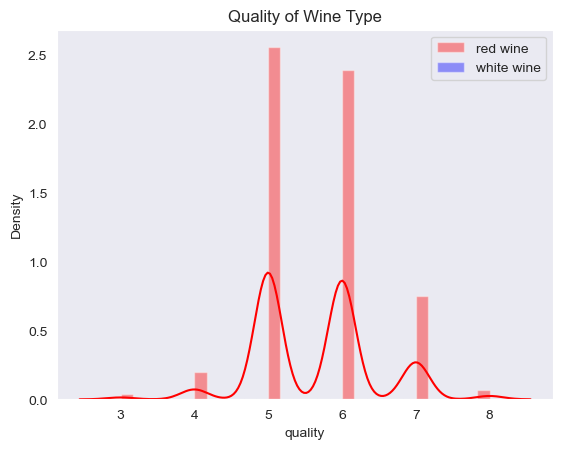

In [78]:
sns.set_style('dark') #배경색 지정
sns.distplot(red_wine_quality,kde=True,color="red",label='red wine')
#레드와인 distplot 생성
sns.distplot(white_wine_quality,kde=True,color="b",label='white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()


In [84]:
import statsmodels.api as sm 

In [85]:
others = list(set(wine.columns).difference(set(["quality","fixed_acidity"])))

ValueError: endog and exog matrices are different sizes

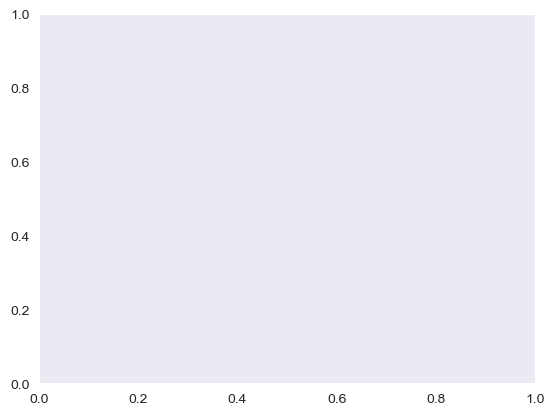

In [87]:
p, resids = sm.graphics.plot_partregress("quality","fixed_acidity",
                                         others,data=wine,ret_coords = True)

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')



ValueError: endog has evaluated to an array with multiple columns that has shape (5, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [172]:
tips.info


<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [ ]:
#유일값 출력/ 등급7개 존재
sorted(wine.quality.unique())
# 객 속성 빈도수
wine.quality.value_counts()
#그룹별 퀄리티 확인
wine.groupby('type')['quality'].describe()
wine.groupby('type')['quality'].std()

In [181]:
sorted(tips.smoker.unique())
tips.smoker.value_counts()



count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [191]:
tips.smoker.describe(include='all')
others2= list(set(tips.columns).difference(set(["smoker"])))

In [216]:

sorted(tips.smoker.unique())
tips.smoker.value_counts()

tips.smoker.describe(include='all')
others2= list(set(tips.columns).difference(set(["smoker"])))
endog = 'tip'
exog_i = 'smoker'

fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_partregress(endog, exog_i, others2, data=tips, ret_coords=True, ax=ax)



(<Figure size 800x600 with 1 Axes>,
 (array([[-0.31719813,  0.31719813],
         [-0.09330113,  0.09330113],
         [-0.22207367,  0.22207367],
         [-0.37957046,  0.37957046],
         [-0.15856864,  0.15856864],
         [-0.151504  ,  0.151504  ],
         [-0.17807773,  0.17807773],
         [-0.20254574,  0.20254574],
         [-0.27290629,  0.27290629],
         [-0.24730241,  0.24730241],
         [-0.20555559,  0.20555559],
         [-0.29503014,  0.29503014],
         [-0.28527581,  0.28527581],
         [-0.07771798,  0.07771798],
         [-0.25042139,  0.25042139],
         [-0.33761581,  0.33761581],
         [-0.09176015,  0.09176015],
         [-0.14761391,  0.14761391],
         [-0.16019244,  0.16019244],
         [-0.42507394,  0.42507394],
         [-0.48576919,  0.48576919],
         [-0.5428603 ,  0.5428603 ],
         [-0.48387677,  0.48387677],
         [-0.5204726 ,  0.5204726 ],
         [-0.52967591,  0.52967591],
         [-0.28552845,  0.28552845],
  

Error in callback <function _draw_all_if_interactive at 0x000002B39DC2C0E0> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 800x600 with 1 Axes>

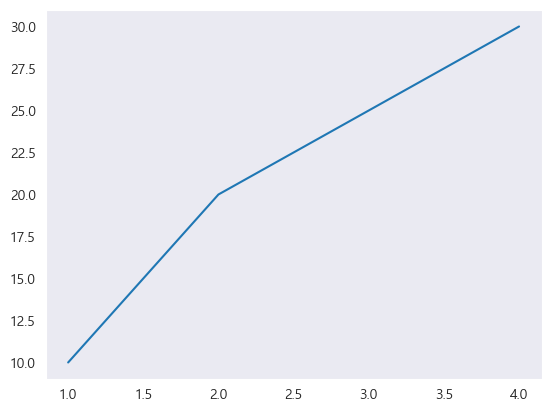

In [217]:
fig, ax = plt.subplots()

# 데이터 플롯
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# 플롯 보여주기
plt.show()

In [220]:
titanic = sns.load_dataset("titanic")
titanic.to_csv('titanic.csv',index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [221]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [229]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [223]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [225]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [228]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['embark_town']= titanic['embark_town'].fillna('Southhampton')
titanic['deck'] = titanic['deck'].fillna('C')

In [233]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

sibsp 함꼐 탑승한 형재자매 혹은 ㅐㅂ우자 수
parch 합꼐 탑승한 부모자식수
embarke 탑승 항구

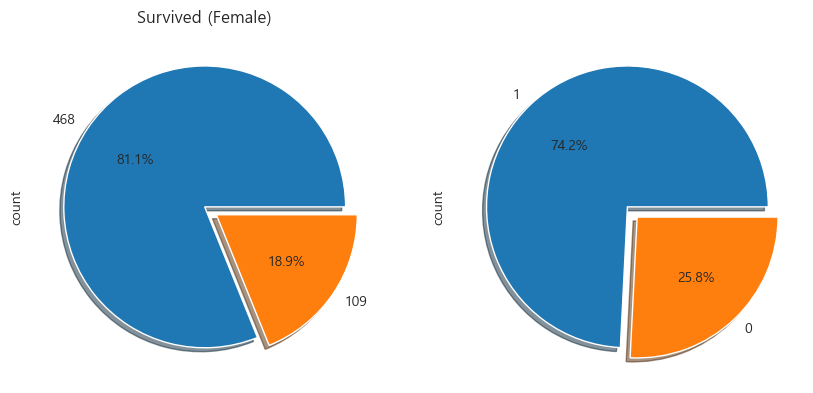

In [244]:
f,ax = plt.subplots(1,2,figsize=(10,5))
value = titanic['survived'][titanic['sex'] == 'male'].value_counts()
value = titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1],
                                                                              autopct= '%1.1f%%',labels=value,
                                                                              ax=ax[0],shadow=True)
value = titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1],
                                                                              autopct= '%1.1f%%',
                                                                              ax=ax[1],shadow=True)
ax[0].set_title('Survived (Male)')
ax[0].set_title('Survived (Female)')
plt.show()

In [247]:
titanic_corr = titanic.corr(method = 'pearson',numeric_only=True)
titanic_corr 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [248]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

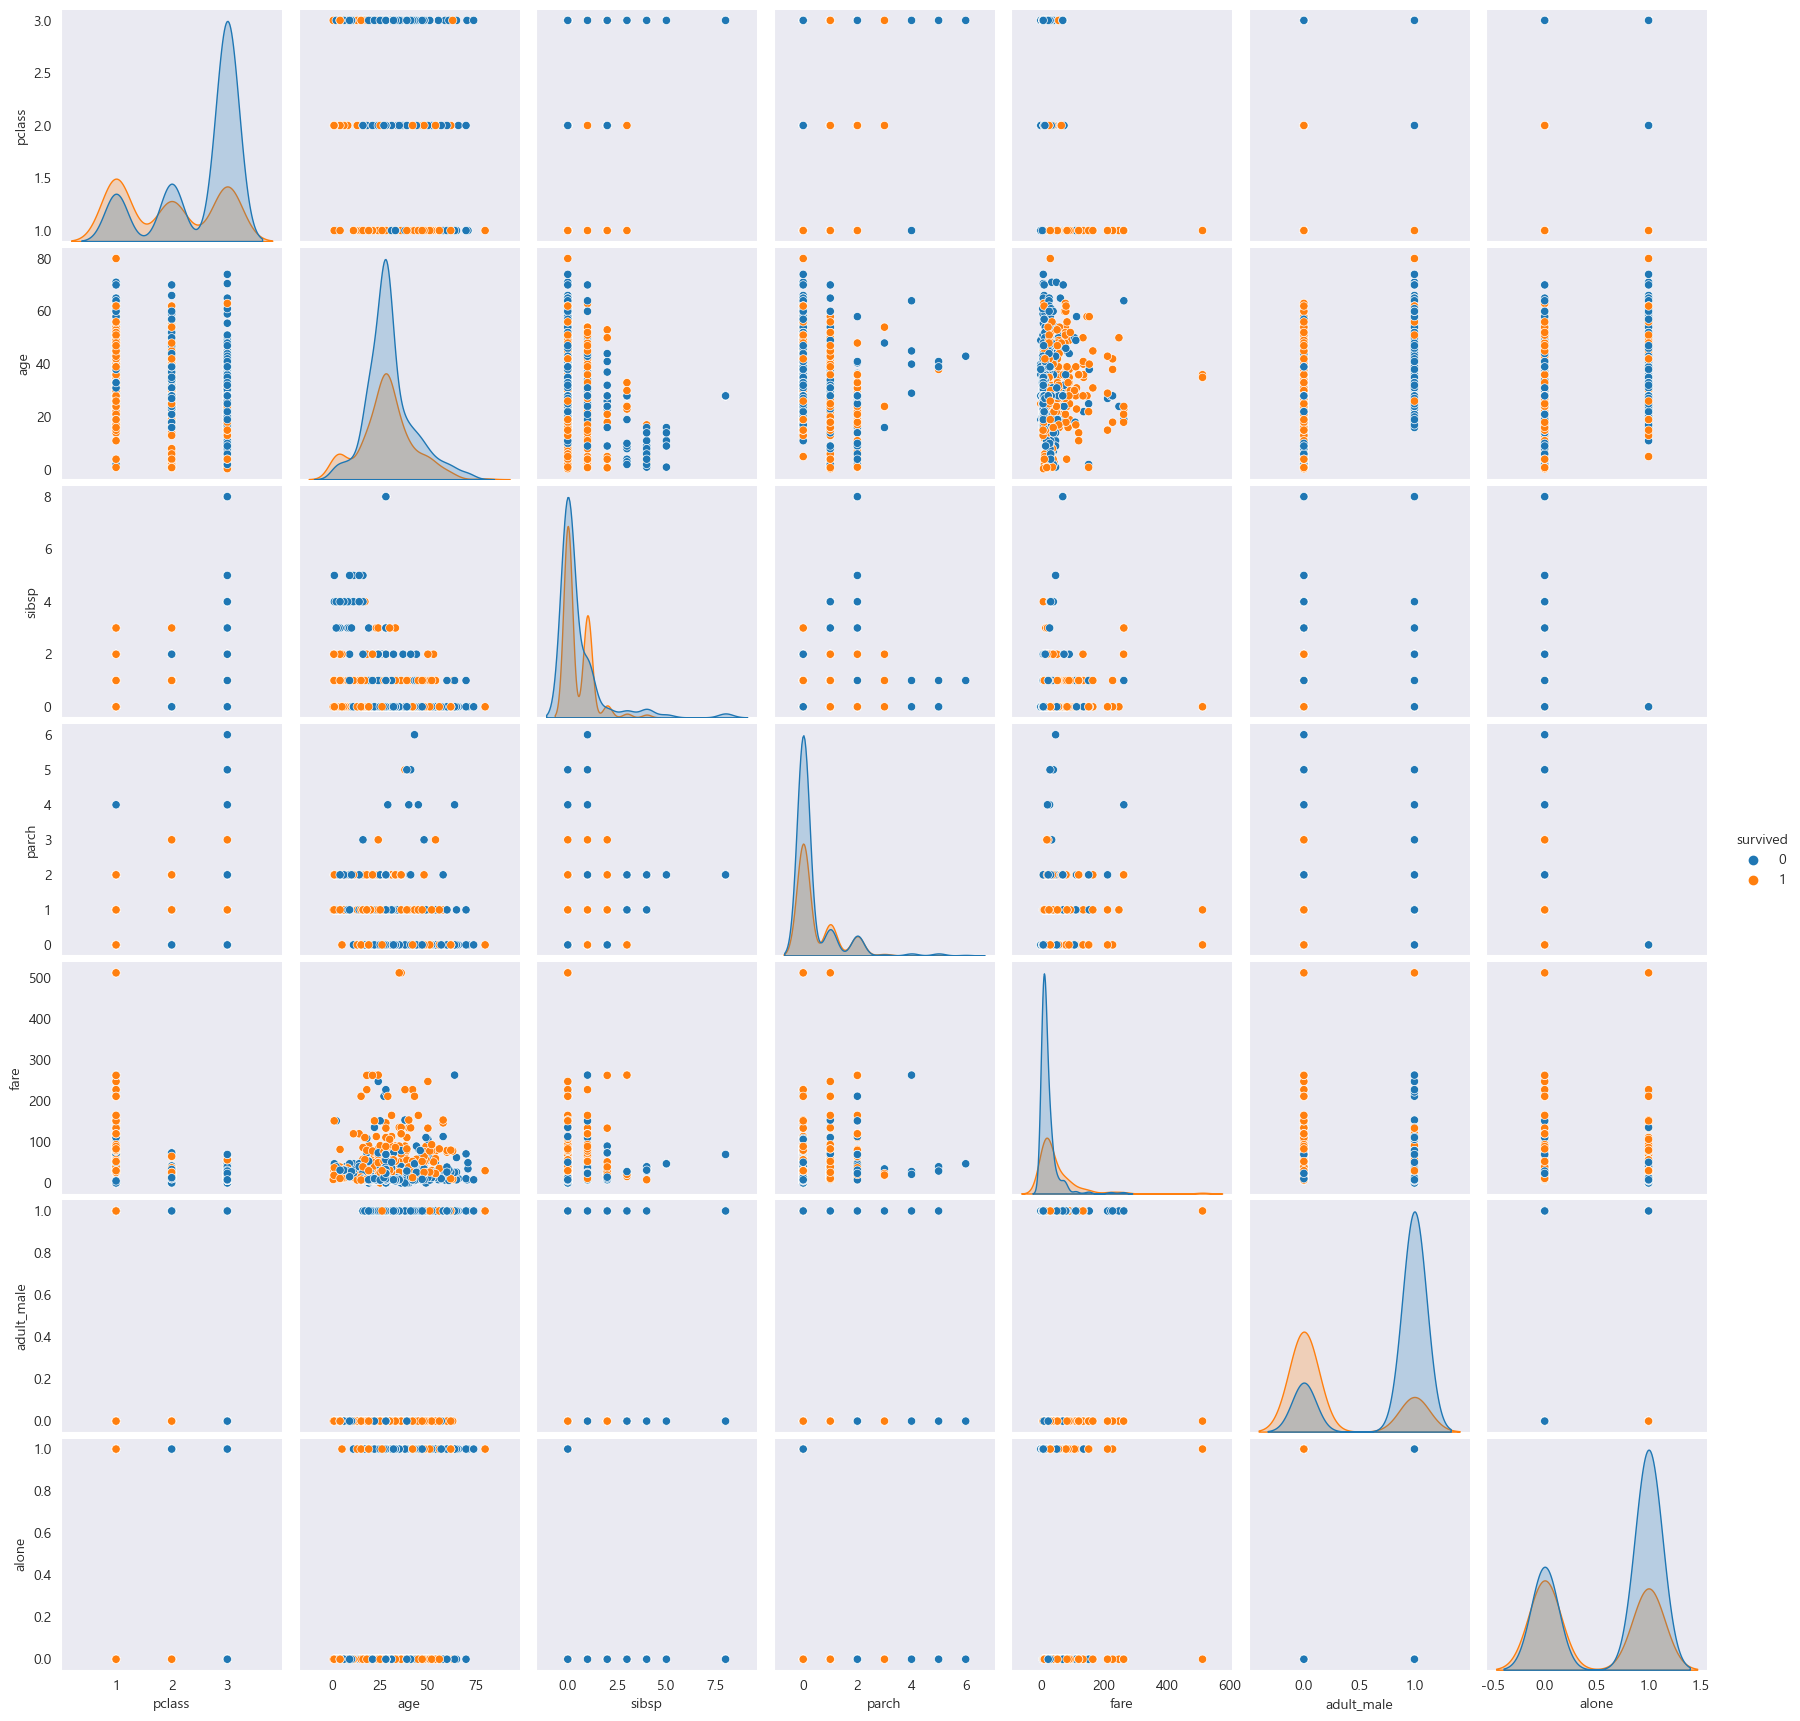

In [249]:
sns.pairplot(titanic,hue = 'survived')


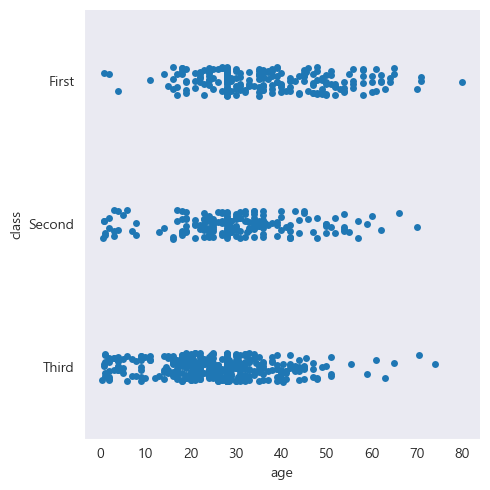

In [251]:
#객실등급과 나이의 상관관계
sns.catplot(data=titanic,x="age",y="class")
plt.show()

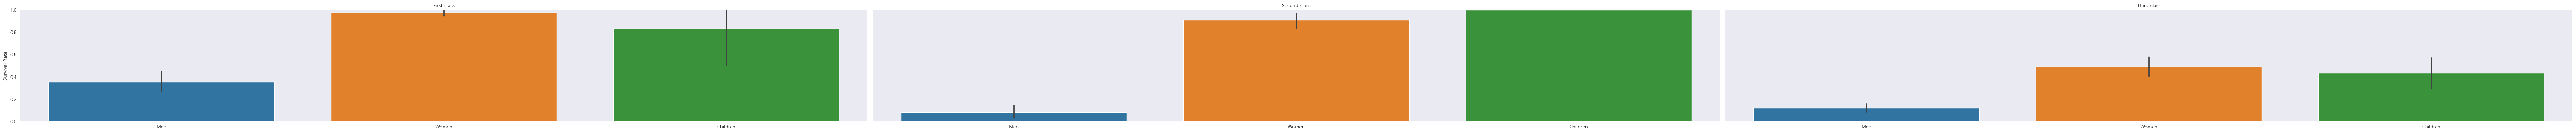

In [261]:
import pandas as pd
g= sns.catplot(
    data=titanic, x="who",y="survived",col="class",
    kind="bar",height=4,aspect=6
)
g.set_axis_labels("","Survival Rate")
g.set_xticklabels(["Men","Women","Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0,1))
g.despine(left=True)

In [262]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [291]:
iris = sns.load_dataset('iris')
iris.head()
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

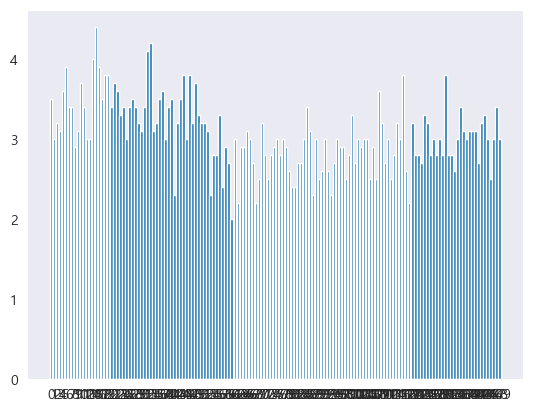

In [273]:
cnt = len(iris)
x = np.arange(cnt)
xName = iris.index
plt.bar(x,iris['sepal_width'])
plt.xticks(x,xName)
plt.show()

Text(0, 0.5, 'Y-axis')

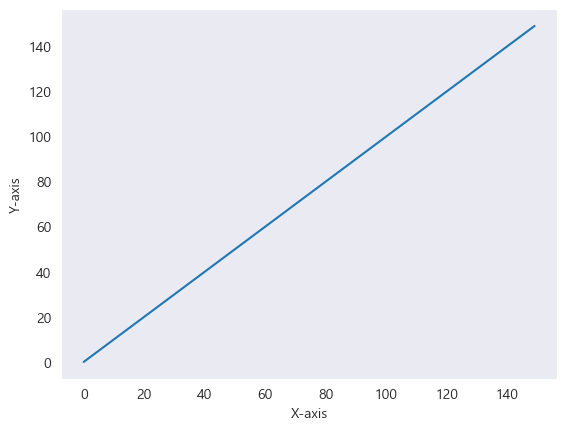

In [279]:
import statsmodels.api as sample1_predict
fig, ax = plt.subplots()
ax.plot(xName,x)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

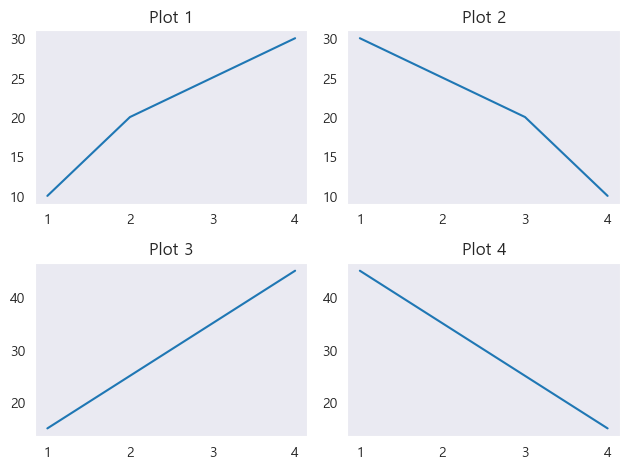

In [276]:
import matplotlib.pyplot as plt

# 2x2 배열의 서브플롯 생성
fig, axes = plt.subplots(2, 2)

# 각 Axes 객체에 데이터 플롯
axes[0, 0].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes[0, 0].set_title('Plot 1')

axes[0, 1].plot([1, 2, 3, 4], [30, 25, 20, 10])
axes[0, 1].set_title('Plot 2')



# 플롯 보여주기
plt.tight_layout()
plt.show()

In [218]:

# 데이터셋 로드
tips = sns.load_dataset('tips')

# 'smoker' 변수를 숫자형으로 변환 (Yes -> 1, No -> 0)
tips['smoker'] = tips['smoker'].map({'Yes': 1, 'No': 0})

# 나머지 독립 변수들 리스트 생성
others2 = list(set(tips.columns).difference(set(["smoker", "tip"])))

# 종속 변수와 독립 변수 설정
endog = 'tip'
exog_i = 'smoker'

# 부분 회귀 플롯 생성
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_partregress(endog, exog_i, others2, data=tips, ret_coords=True, ax=ax)

# 플롯 보여주기
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 800x600 with 1 Axes>